# 载入数据

In [1]:
import numpy as np  
import pandas as pd  
txt = np.loadtxt(r'D:\Documents\python_documents\Practical Business Data Analysis\case\CH1\roe.txt', skiprows=1)    
data = pd.DataFrame(txt, columns=['year', 'ROEt', 'ATO', 'PM', 'LEV', 'GROWTH', 'PB', 'ARR', 'INV', 'ASSET', 'ROE'])  
data.head()

,year,ROEt,ATO,PM,LEV,GROWTH,PB,ARR,INV,ASSET,ROE
0,2002.0,0.296,0.389,0.215,4.384,0.197,8.048,0.637,0.248,20.873,0.181
1,2002.0,0.665,0.335,0.407,2.273,-0.084,2.154,-1.217,0.030,21.062,0.899
2,2002.0,-0.045,0.963,0.084,-5.339,4.155,-12.879,-0.598,0.096,21.474,1.504
3,2002.0,-0.783,0.437,-0.096,1.016,2.231,3.836,0.056,0.051,19.746,-0.777
4,2002.0,1.053,0.858,-0.154,-2.066,0.519,1.972,0.293,0.032,22.570,0.728


In [2]:
data['year'].value_counts()

2003.0    500
2002.0    500
Name: year, dtype: int64

In [3]:
data_2002 = data[data['year']==2002].drop('year', axis=1)
data_2002.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
ROEt      500 non-null float64
ATO       500 non-null float64
PM        500 non-null float64
LEV       500 non-null float64
GROWTH    500 non-null float64
PB        500 non-null float64
ARR       500 non-null float64
INV       500 non-null float64
ASSET     500 non-null float64
ROE       500 non-null float64
dtypes: float64(10)
memory usage: 43.0 KB


In [4]:
data_2002.head()

,ROEt,ATO,PM,LEV,GROWTH,PB,ARR,INV,ASSET,ROE
0,0.296,0.389,0.215,4.384,0.197,8.048,0.637,0.248,20.873,0.181
1,0.665,0.335,0.407,2.273,-0.084,2.154,-1.217,0.030,21.062,0.899
2,-0.045,0.963,0.084,-5.339,4.155,-12.879,-0.598,0.096,21.474,1.504
3,-0.783,0.437,-0.096,1.016,2.231,3.836,0.056,0.051,19.746,-0.777
4,1.053,0.858,-0.154,-2.066,0.519,1.972,0.293,0.032,22.570,0.728


# 描述性分析

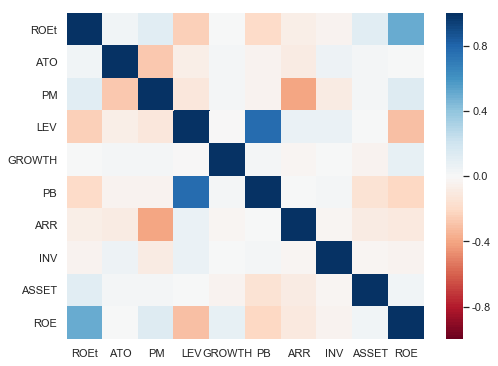

In [9]:
import seaborn as sns
sns.set_context(font_scale=1.5)
sns.heatmap(data_2002.corr(),vmin=-1, vmax=1, cmap=sns.color_palette("RdBu", n_colors=128))

In [6]:
data_2002[['ROE','ROEt']].corr()

,ROE,ROEt
ROE,1.000000,0.515132
ROEt,0.515132,1.000000


Text(0, 0.5, '来年的净资产收益率(ROE)')

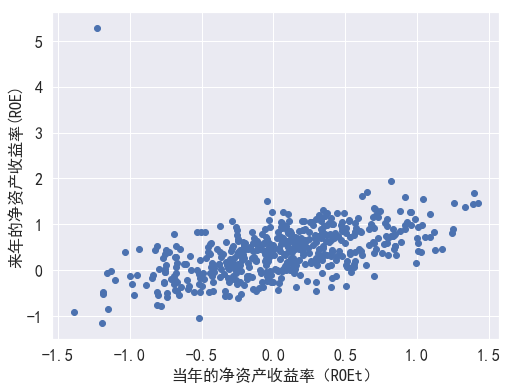

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib.font_manager import FontProperties   #显示中文，并指定字体
myfont=FontProperties(fname=r'C:/Windows/Fonts/simhei.ttf',size=14)
sns.set(font=myfont.get_name())
plt.rcParams['axes.unicode_minus']=False      #显示负号

plt.rcParams["figure.figsize"] = (8, 6)
N = 1000
x = data_2002['ROEt']
y = data_2002['ROE']
plt.scatter(x, y)
sns.set_style("whitegrid")


plt.xticks(fontsize=16)  #旋转x轴刻度,并设置字体大小
plt.yticks(fontsize=16) 
plt.xlabel("当年的净资产收益率（ROEt）", fontsize=16)
plt.ylabel("来年的净资产收益率(ROE)", fontsize=16)

# 参数估计

In [10]:
import pandas as pd
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'ROE ~ROEt + ATO + PM + LEV + GROWTH + PB + ARR + INV + ASSET', data=data_2002).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     24.79
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           4.24e-35
Time:                        11:00:23   Log-Likelihood:                -311.46
No. Observations:                 500   AIC:                             642.9
Df Residuals:                     490   BIC:                             685.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4544      0.528      0.860      0.3

# 模型诊断

   index    resids  std_resids    fitted
0  0.181 -0.199221   -0.437173  0.380221
1  0.899  0.212454    0.466213  0.686546
2  1.504  0.880434    1.932035  0.623566
3 -0.777 -0.788673   -1.730675  0.011673
4  0.728 -0.235258   -0.516254  0.963258


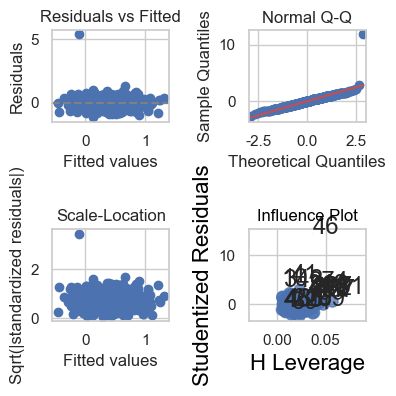

In [11]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Y= data_2002['ROE']
X = data_2002.drop('ROE', axis=1)

 
results = pd.DataFrame({'index': Y, # y实际值
                        'resids': lm.resid, # 残差
                        'std_resids': lm.resid_pearson, # 方差标准化的残差
                        'fitted': lm.predict() # y预测值
                       })
print(results.head()) 
 
#2 绘制在一张画布
fig = plt.figure(figsize = (4, 4) ,dpi = 100)
 
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')
 
 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')
 
 
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')
 
ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(lm, criterion = 'Cooks', size=0.05, ax = ax4)
plt.xlabel('H Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Influence Plot')
plt.tight_layout()

## 删除点46

In [12]:
data_2002_new = data_2002.drop(labels=46)
lm2 = smf.ols(formula = 'ROE ~ROEt + ATO + PM + LEV + GROWTH + PB + ARR + INV + ASSET', data=data_2002_new).fit()
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     40.01
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           2.63e-53
Time:                        11:00:30   Log-Likelihood:                -223.57
No. Observations:                 499   AIC:                             467.1
Df Residuals:                     489   BIC:                             509.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5615      0.444      1.266      0.2

   index    resids  std_resids    fitted
0  0.181 -0.216387   -0.565578  0.397387
1  0.899  0.184482    0.482185  0.714518
2  1.504  0.901545    2.356392  0.602455
3 -0.777 -0.736831   -1.925876 -0.040169
4  0.728 -0.295024   -0.771111  1.023024


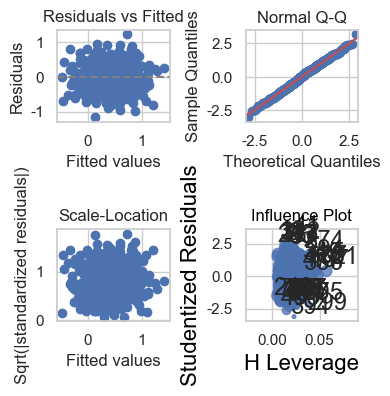

In [14]:
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
 
Y_new = data_2002_new['ROE']
X_new = data_2002_new.drop('ROE', axis=1)
results = pd.DataFrame({'index': Y_new, # y实际值
                        'resids': lm2.resid, # 残差
                        'std_resids': lm2.resid_pearson, # 方差标准化的残差
                        'fitted': lm2.predict() # y预测值
                       })
print(results.head()) 

# 2 绘制在一张画布
fig = plt.figure(figsize = (4, 4) ,dpi = 100)
 
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(results['fitted'], results['resids'],  'o')
l = plt.axhline(y = 0, color = 'grey', linestyle = 'dashed')
ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Residuals')
ax1.set_title('Residuals vs Fitted')
 
 
ax2 = fig.add_subplot(2, 2, 2)
sm.qqplot(results['std_resids'], line='s', ax = ax2)
ax2.set_title('Normal Q-Q')
 
 
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(results['fitted'], abs(results['std_resids'])**.5,  'o')
ax3.set_xlabel('Fitted values')
ax3.set_ylabel('Sqrt(|standardized residuals|)')
ax3.set_title('Scale-Location')
 
ax4 = fig.add_subplot(2, 2, 4)
sm.graphics.influence_plot(lm2, criterion = 'Cooks', size=0.05, ax = ax4)
plt.xlabel('H Leverage')
plt.ylabel('Studentized Residuals')
plt.title('Influence Plot')
 
plt.tight_layout()

In [15]:
predictorcols = list(X_new.columns)   #将各个自变量汇成一个列表
import itertools
AICs = {}
for k in range(1, len(predictorcols)+1):
    #print(k)
    for variables in itertools.combinations(predictorcols, k):
        #Python itertools模块combinations(iterable, r)方法可以创建一个迭代器，
        #返回iterable中所有长度为r的子序列，返回的子序列中的项按输入iterable中的顺序排序。
        predictors = X_new[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y_new, predictors2)
        res = est.fit()
        AICs[variables] = res.aic

from collections import Counter
c = Counter(AICs)   #AICs为字典，则按values来统计，把value视为key出现的次数。注意这是从高到低排列。
c.most_common()[:-11:-1]  #出现次数最少的10个元素，对应这里aic最小的10个值。接着倒序排列。

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


[(('ROEt', 'LEV', 'GROWTH', 'ARR'), 460.2329821532501),
 (('ROEt', 'ATO', 'LEV', 'GROWTH', 'ARR'), 460.6283768792134),
 (('ROEt', 'LEV', 'GROWTH', 'PB', 'ARR'), 461.19972514096423),
 (('ROEt', 'ATO', 'LEV', 'GROWTH', 'PB', 'ARR'), 461.6140178166387),
 (('ROEt', 'LEV', 'GROWTH', 'ARR', 'ASSET'), 461.75382541203805),
 (('ROEt', 'ATO', 'LEV', 'GROWTH'), 461.87606935936094),
 (('ROEt', 'LEV', 'GROWTH'), 461.89600902249265),
 (('ROEt', 'LEV', 'ARR'), 462.0401675212371),
 (('ROEt', 'ATO', 'LEV', 'GROWTH', 'ARR', 'ASSET'), 462.1282771721387),
 (('ROEt', 'LEV', 'GROWTH', 'ARR', 'INV'), 462.1964253197874)]

In [16]:
lm_aic = smf.ols(formula = 'ROE ~ROEt + LEV + GROWTH + ARR', data=data_2002_new).fit()
print(lm_aic.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     89.62
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           3.12e-57
Time:                        11:01:14   Log-Likelihood:                -225.12
No. Observations:                 499   AIC:                             460.2
Df Residuals:                     494   BIC:                             481.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3846      0.018     20.918      0.0

In [17]:
predictorcols = list(X_new.columns)   #将各个自变量汇成一个列表
import itertools
BICs = {}
for k in range(1, len(predictorcols)+1):
    #print(k)
    for variables in itertools.combinations(predictorcols, k):
        #Python itertools模块combinations(iterable, r)方法可以创建一个迭代器，
        #返回iterable中所有长度为r的子序列，返回的子序列中的项按输入iterable中的顺序排序。
        predictors = X_new[list(variables)]
        predictors2 = sm.add_constant(predictors)
        est = sm.OLS(Y_new, predictors2)
        res = est.fit()
        BICs[variables] = res.bic

from collections import Counter
c = Counter(BICs)   #BICs为字典，则按values来统计，把value视为key出现的次数。
c.most_common()[:-11:-1]  #出现次数最少的10个元素，对应这里bic最小的10个值。接着倒序排列。

[(('ROEt', 'LEV'), 476.4945922029711),
 (('ROEt', 'LEV', 'GROWTH'), 478.74643340549875),
 (('ROEt', 'LEV', 'ARR'), 478.8905919042432),
 (('ROEt', 'ATO', 'LEV'), 480.57181235110096),
 (('ROEt', 'LEV', 'PB'), 481.19483809550303),
 (('ROEt', 'LEV', 'GROWTH', 'ARR'), 481.29601263200766),
 (('ROEt', 'PM', 'LEV'), 481.9856424168691),
 (('ROEt', 'LEV', 'ASSET'), 482.3449904851736),
 (('ROEt', 'LEV', 'INV'), 482.69580084572596),
 (('ROEt', 'ATO', 'LEV', 'GROWTH'), 482.9390998381185)]

In [18]:
lm_bic = smf.ols(formula = 'ROE ~ROEt + LEV', data=data_2002_new).fit()           #用BIC选择的自变量来拟合
print(lm_bic.summary())

                            OLS Regression Results                            
Dep. Variable:                    ROE   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     173.5
Date:                Sun, 14 Jul 2019   Prob (F-statistic):           7.62e-58
Time:                        11:01:20   Log-Likelihood:                -228.93
No. Observations:                 499   AIC:                             463.9
Df Residuals:                     496   BIC:                             476.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3830      0.018     21.352      0.0

# 模型预测 

In [19]:
data_2003 = data[data['year']==2003].drop('year', axis=1)  #提取2003的数据
Y_2003 = data_2003['ROE']                                  #划分因变量和自变量
X_2003 = data_2003.drop('ROE', axis=1)

## 直接拿2003的ROEt预测2004年

In [20]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
MSE = mean_squared_error(Y_2003, data_2003['ROEt'])
MAE = mean_absolute_error(Y_2003, data_2003['ROEt'])
R2 = r2_score(Y_2003, data_2003['ROEt'])
print('MSE: ', MSE)
print('MAE: ', MAE)
print('R2: ', R2)

MSE:  0.272143712
MAE:  0.415732
R2:  -0.1132789057211756


## 全模型预测

In [21]:
Y_pred=lm2.predict(X_2003)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("全模型预测")
print("MSE:",mean_squared_error(Y_2003,Y_pred))
print("MAE:",mean_absolute_error(Y_2003,Y_pred))
print("R2:",r2_score(Y_2003,Y_pred))

全模型预测
MSE: 0.14317090235423297
MAE: 0.29445175704717064
R2: 0.4143199402526201


## AIC模型预测

In [22]:
print("AIC模型预测")
Y_pred=lm_aic.predict(X_2003)
print("Coef:",lm_aic.params)     #截距和自变量系数
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE:",mean_squared_error(Y_2003,Y_pred))
print("MAE:",mean_absolute_error(Y_2003,Y_pred))
print("R2:",r2_score(Y_2003,Y_pred))

AIC模型预测
Coef: Intercept    0.384554
ROEt         0.546030
LEV         -0.028790
GROWTH       0.015699
ARR         -0.034533
dtype: float64
MSE: 0.14177190350736815
MAE: 0.2937247425315167
R2: 0.42004293085158284


## BIC模型预测

In [23]:
print("BIC模型预测")
Y_pred=lm_bic.predict(X_2003)
print("Coef:",lm_bic.params)
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
print("MSE:",mean_squared_error(Y_2003,Y_pred))
print("MAE:",mean_absolute_error(Y_2003,Y_pred))
print("R2:",r2_score(Y_2003,Y_pred))

BIC模型预测
Coef: Intercept    0.383049
ROEt         0.549988
LEV         -0.029561
dtype: float64
MSE: 0.14236935366401962
MAE: 0.2947862360331642
R2: 0.41759889622101276
